In [162]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.onetricks.gg/champions/ranking/Evelynn' 
response = requests.get(url)                               
soup = BeautifulSoup(response.content, 'html.parser')      
table = soup.find('table')                                 
rows = table.find_all('tr')                                


Here I import, store and request. Then parse the HTML content of the response using BeautifulSoup. Followed by finding the table element that contains the data and extract the data from the table rows.

In [163]:
with open('TopPlayers.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    writer.writerow(['Character','Tier','Player', 'LP','Play Rate','Games','Win Rate','KDA', 'Region'])

    for row in rows:
        cells = row.find_all('td')
        if len(cells) >= 12: 
            tier = cells[2].text.strip()
            player = cells[4].text.strip()
            lp = cells[7].text.strip()
            playRate = cells[8].text.strip()
            games = cells[9].text.strip()
            winRate = cells[10].text.strip()
            kda = cells[11].text.strip()
            
            if player.endswith('NA1:'):
                region = 'NA1'
            elif player.endswith('EUW1:'):
                region = 'EUW1'
            elif player.endswith('KR:'):
                region = 'KR'
            else:
                region = ''
            
            writer.writerow(["Evelynn", tier, player, lp, playRate, games, winRate, kda, region])

In [164]:
url = 'https://www.onetricks.gg/champions/ranking/Olaf' 
response = requests.get(url)                               
soup = BeautifulSoup(response.content, 'html.parser')      
table = soup.find('table')                                 
rows = table.find_all('tr') 

with open('TopPlayers.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)

    for row in rows:
        cells = row.find_all('td')
        if len(cells) >= 12: 
            tier = cells[2].text.strip()
            player = cells[4].text.strip()
            lp = cells[7].text.strip()
            playRate = cells[8].text.strip()
            games = cells[9].text.strip()
            winRate = cells[10].text.strip()
            kda = cells[11].text.strip()
            
            if player.endswith('NA1:'):
                region = 'NA1'
            elif player.endswith('EUW1:'):
                region = 'EUW1'
            elif player.endswith('KR:'):
                region = 'KR'
            else:
                region = ''
            
            writer.writerow(["Olaf", tier, player, lp, playRate, games, winRate, kda, region])

Here I create a CSV file called "TopEvelynnPlayers.csv". Then I create the header used in the file along with extracting the data from the table cells. A column is also created containing the region of each player, which was extracted from the players name. (In League of Legends the players name and region are generally togethar)

In [148]:
with open('TopPlayers.csv', 'r') as f:
    reader = csv.reader(f)
    rows = [row for i, row in enumerate(reader) if i != 1]

with open('TopPlayers.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(rows)

Here the second row of the CSV file is deleted.

In [149]:
df = pd.read_csv('TopPlayers.csv')
df['Win Rate'] = df['Win Rate'].str.replace('%', '').astype(float)
df['Play Rate'] = df['Play Rate'].str.replace('%', '').astype(float)
df['KDA'] = df['KDA'].str.replace(':1', '').astype(float)
df['LP'] = df['LP'].str.replace('LP', '').astype(int)
df['Games'] = df['Games'].astype(int)

Certain columns "Win Rate", "Play Rate", "KDA", "LP", "Games" are cleaned by getting rid of '%', ':1' or 'LP' to help run code further bellow.

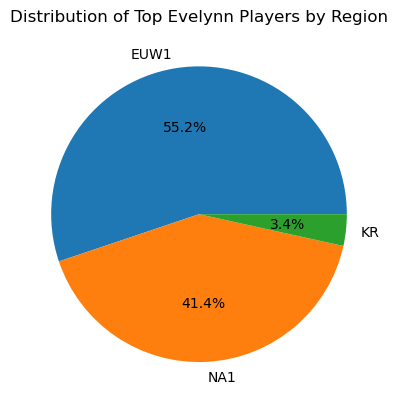

In [150]:
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Top Evelynn Players by Region')
plt.show()

A pie chart is created based off of region. I can notice that EUW1(Europe) has a majority of the best Evelynn players followed by NA1(North America) and KR(Korea).

In [151]:
df["Play Rate"].describe()

count    29.000000
mean     50.241379
std      19.738749
min      20.000000
25%      33.000000
50%      53.000000
75%      62.000000
max      85.000000
Name: Play Rate, dtype: float64

Here is a summary statistic of play rate. It shows that half of the best players who play Evelynn do so 53% of the time. It also shows that there is at least one person who plays it 85% meaning they must really love that character to play it so much. The reason its a little shocking is because when at the high level of game play most players dont stick to on chacacter at least not to the point of playing it almost evey game due to the reason top players end up facing one another repetitively quite often.

In [152]:
df["LP"].describe()

count      29.000000
mean      410.620690
std       199.261568
min       184.000000
25%       285.000000
50%       391.000000
75%       476.000000
max      1158.000000
Name: LP, dtype: float64

Here is a summary statistic of LP. This information shows 75% of players have 476LP or lower. It also showed that a mjority of them have above 100 LP.

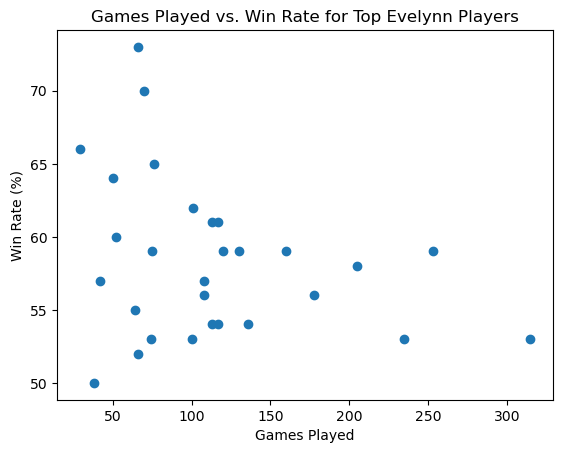

In [153]:
df_sorted = df.sort_values(by=['KDA', 'Win Rate'], ascending=True)

plt.scatter(df_sorted['Games'], df_sorted['Win Rate'])

plt.title('Games Played vs. Win Rate for Top Evelynn Players')
plt.xlabel('Games Played')
plt.ylabel('Win Rate (%)')

plt.show()

This dot plot shows games played compared to win rate. What I can see is that most peoples win rates fall between 60% ~ 50% when they play more games.

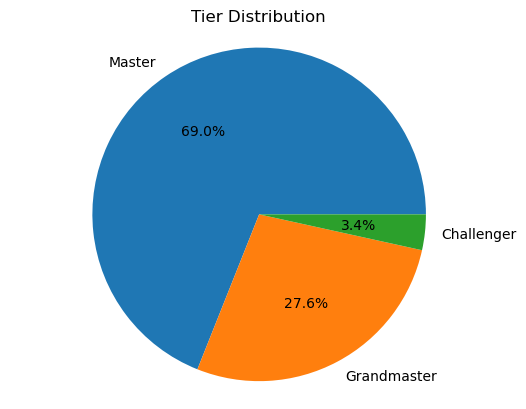

In [154]:
tier_counts = df['Tier'].value_counts()
labels = tier_counts.index.tolist()
sizes = tier_counts.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Tier Distribution')
plt.axis('equal')
plt.show()

This is a pie chart of Tier distribution. The order in ascending order is master, grandmaster, challenger. I can see the majority of the best Evelyn players are in the master tier. I also learned that very few Evelyn players can make it to the challenger tier.

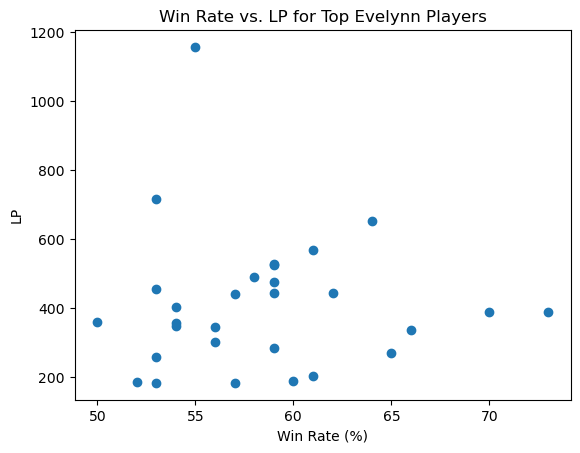

In [155]:
df_sorted = df.sort_values(by=['KDA', 'Win Rate'], ascending=True)

plt.scatter(df_sorted['Win Rate'], df_sorted['LP'])

plt.title('Win Rate vs. LP for Top Evelynn Players')
plt.xlabel('Win Rate (%)')
plt.ylabel('LP')

plt.show()

This is a dot plot that shows win rate vs. LP. I can see that for some reason those who have a smaller win rate tend to get a more points total. This means that those players also get more points per win and loose less points per loss.

In [156]:
df.to_csv("Best_Evelynn_Players.csv")

Now I save a copie of the non-raw Data as a CSV.